In [1]:
# Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path
import seaborn as sns
import numpy as np
%matplotlib inline


In [3]:
#Importing the Data
water = pd.read_csv("water-treatment.data", header=None,na_values="?" )
water

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,D-1/3/90,44101.0,1.50,7.8,NaN,407.0,166.0,66.3,4.5,2110,...,2000.0,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
1,D-2/3/90,39024.0,3.00,7.7,NaN,443.0,214.0,69.2,6.5,2660,...,2590.0,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100.0
2,D-4/3/90,32229.0,5.00,7.6,NaN,528.0,186.0,69.9,3.4,1666,...,1888.0,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,D-5/3/90,35023.0,3.50,7.9,205.0,588.0,192.0,65.6,4.5,2430,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
4,D-6/3/90,36924.0,1.50,8.0,242.0,496.0,176.0,64.8,4.0,2110,...,2120.0,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5
5,D-7/3/90,38572.0,3.00,7.8,202.0,372.0,186.0,68.8,4.5,1644,...,1764.0,NaN,59.7,96.5,86.7,78.3,90.1,73.1,84.9,100.0
6,D-8/3/90,41115.0,6.00,7.8,NaN,552.0,262.0,64.1,5.0,1603,...,1703.0,NaN,61.9,93.8,89.1,79.8,NaN,86.2,90.1,99.0
7,D-9/3/90,36107.0,5.00,7.7,215.0,489.0,334.0,40.7,6.0,1613,...,1606.0,NaN,70.4,95.6,90.6,53.7,92.1,66.9,94.6,100.0
8,D-11/3/90,29156.0,2.50,7.7,206.0,451.0,194.0,69.1,4.5,1249,...,1338.0,46.1,43.6,92.5,85.6,58.2,92.2,73.8,90.2,99.4
9,D-12/3/90,39246.0,2.00,7.8,172.0,506.0,200.0,69.0,5.0,1865,...,1616.0,21.2,59.7,90.8,88.4,66.1,89.0,69.0,86.5,99.6


In [ ]:
#EDA

In [4]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 39 columns):
0     527 non-null object
1     509 non-null float64
2     524 non-null float64
3     527 non-null float64
4     504 non-null float64
5     521 non-null float64
6     526 non-null float64
7     516 non-null float64
8     502 non-null float64
9     527 non-null int64
10    527 non-null float64
11    487 non-null float64
12    527 non-null int64
13    516 non-null float64
14    503 non-null float64
15    527 non-null int64
16    527 non-null float64
17    499 non-null float64
18    518 non-null float64
19    525 non-null float64
20    514 non-null float64
21    502 non-null float64
22    527 non-null int64
23    526 non-null float64
24    504 non-null float64
25    509 non-null float64
26    522 non-null float64
27    510 non-null float64
28    499 non-null float64
29    526 non-null float64
30    465 non-null float64
31    523 non-null float64
32    500 non-null float64
33    487 non

In [5]:
water.isnull().sum()

0      0
1     18
2      3
3      0
4     23
5      6
6      1
7     11
8     25
9      0
10     0
11    40
12     0
13    11
14    24
15     0
16     0
17    28
18     9
19     2
20    13
21    25
22     0
23     1
24    23
25    18
26     5
27    17
28    28
29     1
30    62
31     4
32    27
33    40
34    26
35    36
36    25
37     8
38    31
dtype: int64

In [6]:
water.describe()

,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
count,509.000000,524.000000,527.000000,504.000000,521.000000,526.000000,516.000000,502.000000,527.000000,527.000000,...,526.000000,465.000000,523.000000,500.000000,487.000000,501.000000,491.000000,502.000000,519.000000,496.000000
mean,37226.567780,2.359065,7.810057,188.714286,406.898273,227.444867,61.393217,4.593825,1478.620493,7.829981,...,1494.817490,39.085806,58.518738,90.554200,83.448049,67.817365,89.013646,77.856574,88.963391,99.086290
std,6635.999806,2.749509,0.246175,62.062831,120.362974,135.940589,12.415264,2.743947,394.898019,0.226925,...,387.906161,14.792976,12.802547,8.944776,8.804256,11.617612,7.027651,8.888932,8.221612,4.457165
min,10050.000000,0.100000,6.900000,31.000000,81.000000,98.000000,13.200000,0.400000,651.000000,7.300000,...,683.000000,0.600000,5.300000,7.700000,8.200000,1.400000,19.600000,19.200000,10.300000,36.400000
25%,32888.000000,0.900000,7.600000,146.750000,325.000000,170.000000,55.700000,3.100000,1201.000000,7.700000,...,1234.500000,29.300000,50.550000,88.600000,81.400000,63.100000,87.600000,74.000000,87.600000,99.300000
50%,35990.000000,1.500000,7.800000,182.500000,400.000000,196.000000,64.300000,4.500000,1406.000000,7.800000,...,1432.000000,39.600000,59.500000,93.300000,85.400000,69.900000,90.200000,79.150000,90.700000,99.700000
75%,41372.000000,3.000000,8.000000,223.000000,478.000000,242.000000,69.725000,5.500000,1672.000000,8.000000,...,1692.250000,49.200000,66.900000,96.000000,87.900000,75.300000,92.450000,83.400000,93.100000,100.000000
max,60081.000000,33.500000,8.700000,438.000000,941.000000,2008.000000,85.000000,36.000000,3230.000000,8.500000,...,3950.000000,79.100000,96.100000,100.000000,94.700000,96.800000,97.000000,98.100000,99.400000,100.000000


In [7]:
null_id = water.loc[water[1].isnull(), :].index
null_id

Int64Index([436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448,
            449, 450, 451, 452, 453],
           dtype='int64')

In [8]:
df = water.copy()
df.columns = water.columns.astype(str)

In [9]:
# Drop any nulls in the plant inflows columns. 
water.dropna(axis=0, how='any', subset=[1], inplace=True)

In [10]:
water.isna().sum()

0      0
1      0
2      3
3      0
4     23
5      6
6      1
7     11
8     25
9      0
10     0
11    40
12     0
13    11
14    24
15     0
16     0
17    28
18     7
19     2
20    13
21    25
22     0
23     1
24    23
25    18
26     5
27    17
28    28
29     1
30    62
31     4
32    27
33    40
34    24
35    36
36    25
37     8
38    31
dtype: int64

In [ ]:
# Make a paiwise scatter plot.
'''plt.figure(figsize=(20, 10))
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, kind="reg")
plt.show()'''

Finding the Correlations

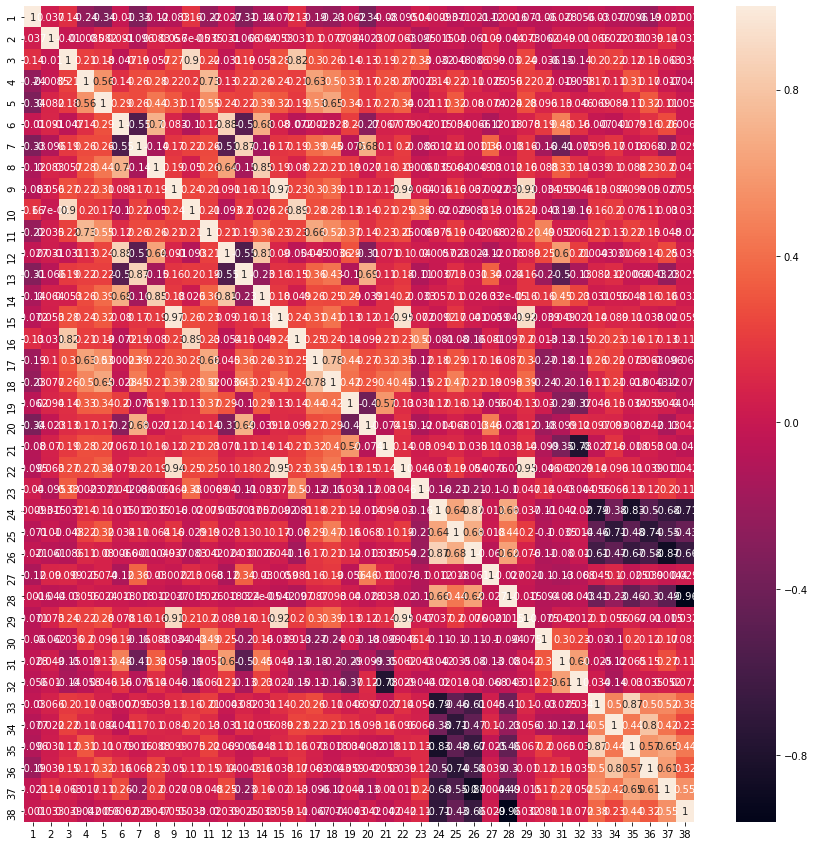

In [11]:
# Plot correlations on a heatmap
plt.figure(figsize=[15, 15])
sns.heatmap(df.corr(), annot=True)
plt.show()

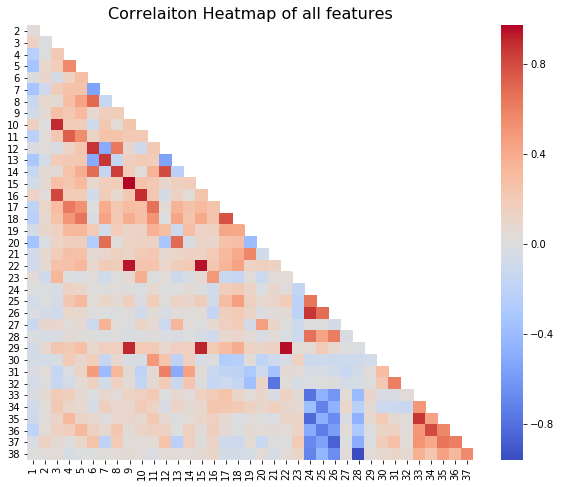

In [12]:
# Review if any potential correlations between attributes
corr_mat = df.corr()
mask = np.tril(np.ones_like(corr_mat, dtype = np.bool), k=-1)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat.where(mask).iloc[1:,:-1], annot=False, cmap = 'coolwarm')
plt.title('Correlaiton Heatmap of all features', fontsize=16)
plt.show()

Removing column 1,2,3,9

In [13]:

# Assign feature data

# Select those features (columns) which may be useful 
x = np.r_[1, 4:9, 11:15, 17:22, 24:29, 30:39]

X = water.iloc[:, x].values
print(f"Attribute numbers to keep: {x}")

Attribute numbers to keep: [ 1  4  5  6  7  8 11 12 13 14 17 18 19 20 21 24 25 26 27 28 30 31 32 33
 34 35 36 37 38]


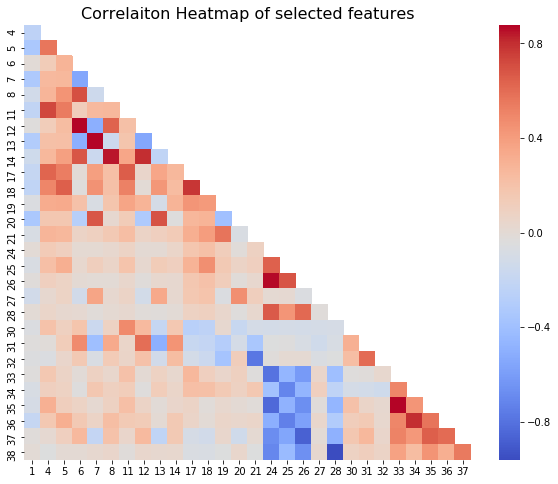

In [14]:
# Review if any potential correlations between attributes
corr_mat = df.iloc[:, x].corr()
mask = np.tril(np.ones_like(corr_mat, dtype = np.bool), k=-1)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat.where(mask).iloc[1:,:-1], annot=False, cmap = 'coolwarm')
plt.title('Correlaiton Heatmap of selected features', fontsize=16)
plt.show()

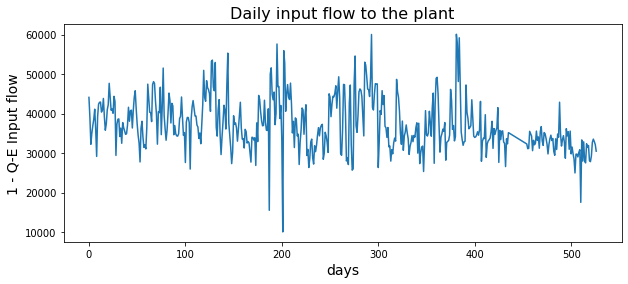

In [16]:
# Line chart of the Input Flow into the plant
plt.figure(figsize=(10,4))
plt.title("Daily input flow to the plant", fontsize=16)
plt.xlabel("days", fontsize=14)
plt.ylabel("1 - Q-E Input flow", fontsize=14)
sns.lineplot(data=df.iloc[:, 1]);

In [17]:
#Spliting the data and traing the models

In [19]:
from sklearn.impute import SimpleImputer
# Replace null values with the mean of the column
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imp.fit_transform(X)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

C:\Users\Suraj.Negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  f"KMeans is known to have a memory leak on Windows "


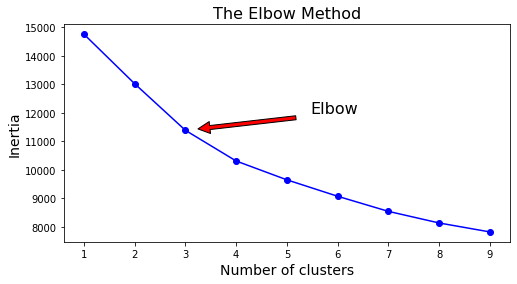

In [21]:
#Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
max_num_clusters = 10 # Assign a number 
kmeans_per_k = [KMeans(n_clusters=k, init= 'k-means++', random_state=0).fit(X) 
                for k in range(1,max_num_clusters)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8,4))
plt.plot(range(1,max_num_clusters), inertias, "bo-")
plt.title("The Elbow Method", fontsize=16)
plt.xlabel("Number of clusters", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
elbow_tick = 3  # number of clusters where the elbow is located
plt.annotate("Elbow",
             xy = (elbow_tick, inertias[elbow_tick - 1]),
             xytext = (0.6, 0.6),
             textcoords = 'figure fraction',
             fontsize = 16,
             arrowprops = dict(facecolor='red', shrink=0.1)
            )
plt.show()

C:\Users\Suraj.Negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  f"KMeans is known to have a memory leak on Windows "


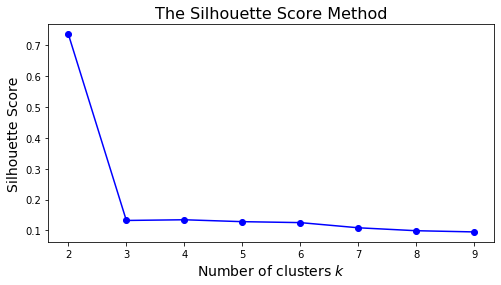

In [26]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
kmeans_per_k = [KMeans(n_clusters=k, init= 'k-means++', random_state=0).fit(X) 
                for k in range(1,max_num_clusters + 1)]
silhouette_score_per_k = [silhouette_score(X, model.labels_)
                            for model in kmeans_per_k[1:]]
plt.figure(figsize=(8,4))
plt.plot(range(2,max_num_clusters), silhouette_score_per_k[:-1], "bo-")
plt.title('The Silhouette Score Method', fontsize=16)
plt.xlabel("Number of clusters $k$", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
elbow_tick = 4
plt.show()

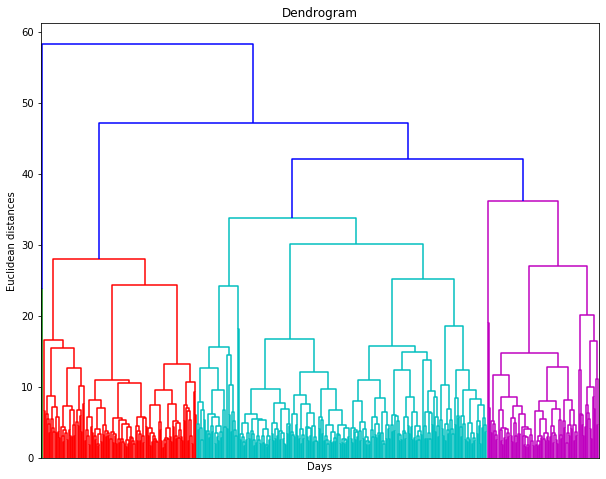

In [27]:
#For Hierarchical Clustering
# Using the dendrogram to find the optimal number of clusters
# Measure to find the maximum vertical distance between horizontal
# lines. The highest y value crosses N number of vertical lines = clusters.
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 8))

plt.rcParams['axes.grid'] = False
plt.title('Dendrogram')
plt.xlabel('Days')
plt.ylabel('Euclidean distances')
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'), no_labels=True)
plt.show()

In [28]:
# Training the K-Means model on the dataset
n_clusters = 4
kmeans = KMeans(n_clusters= n_clusters, init= 'k-means++', random_state=0).fit(X)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans) 

[2 2 2 2 2 2 2 2 2 2 0 0 0 2 1 1 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2
 2 1 1 1 3 2 2 2 2 3 3 3 3 1 1 2 2 2 2 2 1 1 3 1 1 1 2 2 2 1 1 3 2 2 2 1 1
 2 2 2 2 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 2 1 1 3 1 2 1 1 1 2 1 1 1 1 1 1 2 2
 0 1 1 3 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 1 2 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 3 3 1 1 1 1 1 2 2 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 1 1 1 2 1 2 2 1 1 1
 1 1 2 2 1 1 1 1 2 2 2 2 2 2 2 2 1 3 3 2 2 1 1 1 1 1 1 1 1 1 1 2 1 3 3 3 2
 1 1 1 1 3 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 1 1 2 1 2 2 2 2 2 2
 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 1 1 1 1 2 2 1 1 1 1 1 2 2 2 2 1 1 1 2 2 3 1 1 3 2 3 3 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 3 2 1 1 2 1 1 1 1 1 2 1 2 1 1 2 2 1 2 2 1 2
 2 2 2 1 1 2 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 1 2 1 2
 1 2 2 1 1 1 1 1 1 3 1 1 

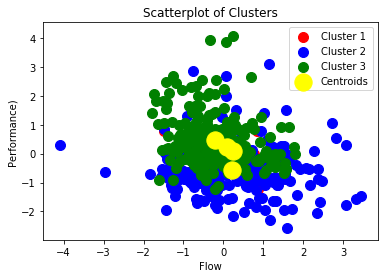

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Scatterplot of Clusters')
plt.xlabel('Flow')
plt.ylabel('Performance)')
plt.legend()
plt.show()

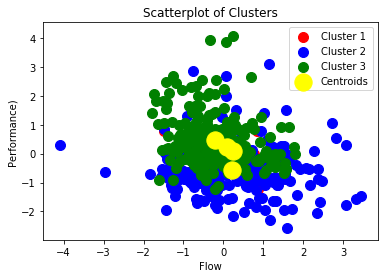

In [30]:
# Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Scatterplot of Clusters')
plt.xlabel('Flow')
plt.ylabel('Performance)')
plt.legend()
plt.show()

In [38]:

from sklearn.cluster import dbscan
from sklearn.datasets import make_moons

from queue import Queue
# Create Blobs
blobs = make_moons(500, noise=0.055)[0]

# Standardized the data
for x in range(2):
    m = blobs[:,x].mean()
    s = blobs[:,x].std()
    for y in range(len(blobs)):
        blobs[y,x] = (blobs[y,x] - m)/s

# Scikit-Learn DBSCAN
preds = dbscan(blobs, 0.2, 4)[1]
dbscan_blob = np.append(blobs, preds.reshape(-1,1), axis=1)
pd.DataFrame(dbscan_blob).plot(x=1, y=0, kind="scatter", c=2, colorbar=False, ax=ax[2], title= "Scikit-Learn DBSCAN (eps=0.2, min_points=5)", marker="+", colormap="tab20b")

# Test Data
pd.DataFrame(blobs).plot(x=1, y=0, kind="scatter", ax=ax[0], alpha=0.5, figsize=(15,6), title="Test Data", marker="+", c="#e377c0")
plt.show()

C:\Users\Suraj.Negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass min_samples=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
